# Data Science Conversion Rate Problem

The goal of this challenge is to optimize conversion rate.

Today we have lots of data on people who buy our product online and those that don't. This gives us a great opportunity to understand what's working well (and perhaps scale it further) and what's not working so well (and aim to fix it).

The purpose of this notebook is to build a model that predicts conversion rate and, based on the
model, come up with ideas to improve revenue.

Challenge Description:
We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, marketing channel, age, whether they are
repeat users and the number of pages visited during that session.

Your project is to:
- Predict conversion rate
- Come up with recommendations for the product team and the marketing team to improve conversion rate

## 1. Import

### 1.1 Libraries & Data

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in our data

df = pd.read_csv("conversion_data.csv")

### 1.2 Look at table and basic stats

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


#### Looking at the above:
- For the columns:
    - country: user country
    - age: user age (self reported)
    - new_user: 0 if the user already has an account, 1 if creating a new account
    - source: marketing channel
        - Ads: came to the site via an advertisement
        - Seo: came to the site via a search engine
        - Direct : came to the site directly (typing url into browser)
    - total_pages_visited: number of pages the user visited during their session - proxy for time spent on the website 
    - converted: 0 if the user didn't purchase/convert, 1 if the user did purchase/convert

- 316,200 total rows with 69% of those events/people being new users
- The conversion rate is 3.2% (looking at the mean of the converted column)    

### 1.3 Anomolous Age's

Looking at the summary for the "age" data we see that there is an outlier at 123 years, let's investigate further

In [5]:
df[df["age"]>90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


#### As there are only 2 users with these anomalous ages, we will simply remove them from the dataset and move on.  

In [6]:
df = df[df["age"]<90]

## 2. Exploratory Data Analysis

### 2.1 Converted vs. Non-Converted

In [7]:
converted = df[df['converted']==1]

non_converted = df[df['converted']==0]

In [8]:
df.groupby("converted").describe()

age       new_user  total_pages_visited
converted                                                         
0         count  306000.000000  306000.000000        306000.000000
          mean       30.703961       0.698382             4.550281
          std         8.275779       0.458961             2.789910
          min        17.000000       0.000000             1.000000
          25%        24.000000       0.000000             2.000000
          50%        30.000000       1.000000             4.000000
          75%        36.000000       1.000000             6.000000
          max        79.000000       1.000000            20.000000
1         count   10198.000000   10198.000000         10198.000000
          mean       26.529025       0.298000            14.553932
          std         6.937305       0.457402             3.963522
          min        17.000000       0.000000             2.000000
          25%        21.000000       0.000000            12.000000
          50%        25.000000       0.000000            14.000000
          75%        31.000000       1.000000            17.000000
          max        61.000000       1.000000            29.000000

#### Converted vs. Non-Converted stats:
- Average age of 27 for converted users and 31 for non-converted
- 30% of users who convert are new to the site, whilst 60% of the users who don't convert are new to the site
- Converters visit an average of 15 pages, 5 pages for non-converters

### 2.2 Different countries

In [9]:
df.groupby("country").describe()

age      converted       new_user  \
country                                                      
China   count   76602.000000   76602.000000   76602.000000   
        mean       30.672972       0.001332       0.698520   
        std         8.283862       0.036466       0.458904   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max        69.000000       1.000000       1.000000   
Germany count   13055.000000   13055.000000   13055.000000   
        mean       30.442895       0.062428       0.677288   
        std         8.249662       0.241941       0.467531   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max        64.000000       1.000000       1.000000   
UK      count   48449.000000   48449.000000   48449.000000   
        mean       30.449875       0.052612       0.679849   
        std         8.236950       0.223260       0.466539   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max        70.000000       1.000000       1.000000   
US      count  178092.000000  178092.000000  178092.000000   
        mean       30.566482       0.037801       0.681985   
        std         8.272128       0.190714       0.465707   
        min        17.000000       0.000000       0.000000   
        25%        24.000000       0.000000       0.000000   
        50%        30.000000       0.000000       1.000000   
        75%        36.000000       0.000000       1.000000   
        max        79.000000       1.000000       1.000000   

               total_pages_visited  
country                             
China   count         76602.000000  
        mean              4.553523  
        std               2.804987  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               6.000000  
        max              26.000000  
Germany count         13055.000000  
        mean              5.189966  
        std               3.762064  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               7.000000  
        max              27.000000  
UK      count         48449.000000  
        mean              5.082066  
        std               3.630731  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               7.000000  
        max              27.000000  
US      count        178092.000000  
        mean              4.930160  
        std               3.427085  
        min               1.000000  
        25%               2.000000  
        50%               4.000000  
        75%               7.000000  
        max              29.000000

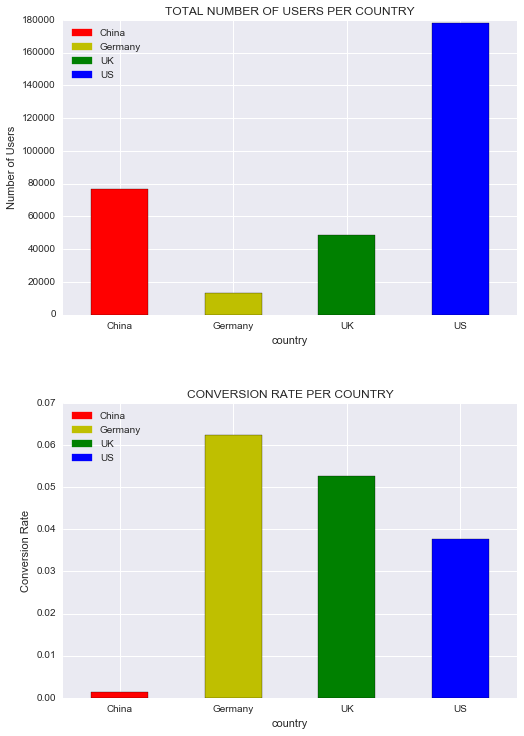

In [10]:
# let's create some plots that show the user breakdown per country
import matplotlib.patches as mpatches

# create some color patches and labels
china_leg = mpatches.Patch(color='r', label='China')
germany_leg = mpatches.Patch(color='y', label='Germany')
uk_leg = mpatches.Patch(color='g', label='UK')
us_leg = mpatches.Patch(color='b', label='US')

# create subplots of correct size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7,10))
fig.tight_layout()
plt.subplots_adjust(hspace = 0.3) # adjust the space between the subplots

# plot total users per country
df.groupby("country").age.count().plot(kind="bar", title="TOTAL NUMBER OF USERS PER COUNTRY",\
                                       color=['r','y','g','b'], ax=axes[0], rot=0)

# plot conversion rate per country
df.groupby("country").converted.mean().plot(kind="bar", title="CONVERSION RATE PER COUNTRY",\
                                            color=['r','y','g','b'], ax=axes[1], rot=0)

# create an identical legend for each plot
axes[0].legend(loc=2, handles=[china_leg, germany_leg, uk_leg, us_leg])
axes[1].legend(loc=2, handles=[china_leg, germany_leg, uk_leg, us_leg])

# set y-axis labels
axes[0].set_ylabel("Number of Users")
axes[1].set_ylabel("Conversion Rate")

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

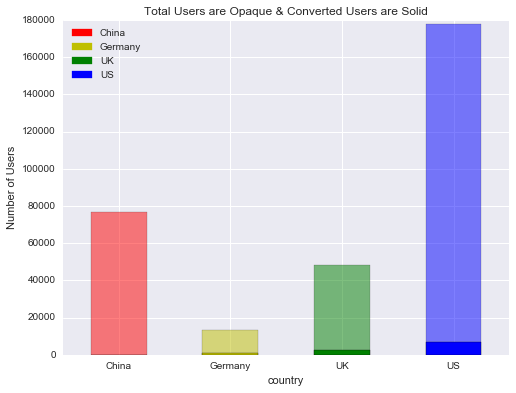

In [11]:
# create a plot combining the information found above

# set the plot size
plt.figure(figsize=(8,6))

# plot total users
df.groupby("country").converted.count().plot(kind="bar",\
                                title="Total Users are Opaque & Converted Users are Solid",\
                                color=['r', 'y', 'g', 'b'],\
                                alpha=0.5)

# plot converted users
df[df["converted"]==1].groupby("country").converted.count().plot(kind="bar",\
                                color=['r', 'y', 'g', 'b'])
# add a coloured legend
plt.legend(loc=2, handles=[china_leg, germany_leg, uk_leg, us_leg])
plt.ylabel("Number of Users")
plt.xticks(rotation='horizontal')

#### Looking at the above:
- The US and China are the biggest users of the site.
- However China has a seriously low conversion rate - something must be wrong with the Chinese version of the site - perhaps incorrect translation?
- Germany has an excellent conversion rate - definitely worth investigating

### 2.3 Number of pages visited

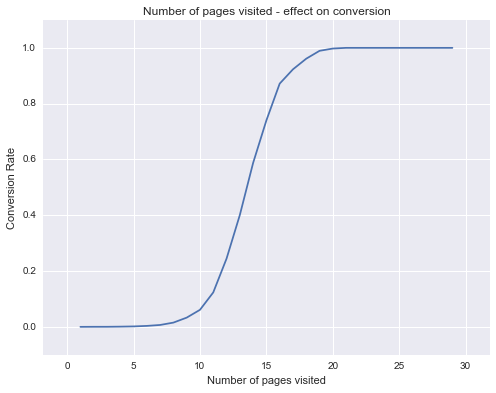

In [12]:
# Plot conversion rate vs. num pages visited

fig = plt.figure(figsize=(8,6))
plt.plot(df.groupby("total_pages_visited").converted.mean())
plt.margins(x=0.1,y=0.1)
plt.title("Number of pages visited - effect on conversion")
plt.ylabel("Conversion Rate")
plt.xlabel("Number of pages visited")

plt.show()

#### Looking at the above:
- Clicking more pages on the site increases the chances of conversion
- Extra pages associated with user conversion process at least partially responsible

### 2.4 Effect of age on conversion

In [13]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Histogram(
    x=df[df["converted"]==1].age,
    opacity=0.5, histnorm='probability',
    name='Converted User'
)

trace2 = go.Histogram(
    x=df[df["converted"]==0].age,
    opacity=0.5, histnorm='probability',
    name='Non-Converted User'
)

data = [trace1, trace2]

layout = go.Layout(
    title='Age Profile of Converted vs. Non-Converted Users',
    barmode='overlay',
    xaxis=dict(title='Age'),
    
    yaxis=dict(title='Normalized Frequency'),

    # Mean lines
    shapes= [{'line': {'color': '#0099FF', 'dash': 'solid', 'width': 1},
    'type': 'line',
    'x0': df[df["converted"]==1].age.mean(),
    'x1': df[df["converted"]==1].age.mean(),
    'xref': 'x',
    'y0': 0,
    'y1': 0.9,
    'yref': 'paper'},
   {'line': {'color': '#FDAB5A', 'dash': 'solid', 'width': 1},
    'type': 'line',
    'x0': df[df["converted"]==0].age.mean(),
    'x1': df[df["converted"]==0].age.mean(),
    'xref': 'x',
    'y0': 0,
    'y1': 0.90,
    'yref': 'paper'}],

    # Annotations
    annotations=[
        dict(
            x=df[df["converted"]==1].age.mean(),
            y=1,
            xref='x',
            yref='paper',
            text="Mean Age of Converted User = {:,.0f}".format(df[df["converted"]==1].age.mean()),
            showarrow=True,
            arrowhead=7,
            ax=1,
            ay=1,
            axref='paper',
            ayref='paper'
        ),
        dict(
            x=df[df["converted"]==0].age.mean(),
            y=0.95,
            xref='x',
            yref='paper',
            text="Mean Age of Non-Converted User = {:,.0f}".format(df[df["converted"]==0].age.mean()),
            showarrow=True,
            arrowhead=7,
            ax=1,
            ay=1,
            axref='paper',
            ayref='paper'
        )
    ]

) 

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\James\Anaconda2\lib\site-packages\plotly\plotly\plotly.py:236: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



#### Looking at the above:
- Overall the site has a young userbase
- We can see that the site is more successful at converting younger people, whereas older people have more difficulty converting

## 3. Modelling

### 3.1 Import Libraries

In [14]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.model_selection import GridSearchCV

### 3.2 Encode non-numerical features

In [15]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [16]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

# Encoding the variable
df = df.apply(lambda x: d[x.name].fit_transform(x))

# Use code below to reverse encoding
# return2orig = df.apply(lambda x: d[x.name].inverse_transform(x))

df.head()

,country,age,new_user,source,total_pages_visited,converted
0,2,8,1,0,0,0
1,3,6,1,2,4,0
2,3,11,1,2,3,0
3,0,22,1,2,4,0
4,3,13,1,2,5,0


### 3.3 Random Forest parameter search
- Choose a random forest model to predict conversion rate
- RF chosen as it is strong with outliers, irrelevant variables, continuous and discrete variables
- Perform parameter testing using 15-fold cross-validation

In [17]:
# first create a feature list

features = ["country", "age", "source", "new_user", "total_pages_visited"]

In [18]:
def model_param_search(df, features, target, classifier, param_grid):
    """Test our various models"""
    
    # split our data into train and test split, set random_state=1 so we can repeat analysis
    train, test = train_test_split(df, test_size=0.3) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
    #scale the features
    min_max_scaler = MinMaxScaler()
    X_train = min_max_scaler.fit_transform(X_train) 
    X_test = min_max_scaler.transform(X_test)

    # Set the parameters by cross-validation
    param_grid = param_grid
    
    scores = ['precision', 'recall']

    for score in scores:
        print "# Tuning hyper-parameters for %s" % score
        
        clf = GridSearchCV(classifier, param_grid, cv=15,
                       scoring='%s_macro' % score)
        clf.fit(X_train, y_train)

        print "Best Accuracy: %.2f%%" % clf.best_score_
        print "Best parameters set found on development set:"
        print  
        print clf.best_params_
     
        y_true, y_pred = y_test, clf.predict(X_test)
        print "Detailed classification report:"
        print ""
        print "The model is trained on the full development set."
        print "The scores are computed on the full evaluation set."
        print ""
        print classification_report(y_true, y_pred), "\n\n"

In [19]:
# define the parameter values that should be searched
randforest_param_grid = {"max_depth": [None, 5],
                         "n_estimators": [10, 100],
                         "min_samples_split": [2, 10]
                        }

randforest = RandomForestClassifier()

In [20]:
#%%time
model_param_search(df, features, "converted", randforest, randforest_param_grid)

# Tuning hyper-parameters for precision
Best Accuracy: 0.93%
Best parameters set found on development set:

{'min_samples_split': 10, 'n_estimators': 10, 'max_depth': 5}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91797
          1       0.85      0.68      0.76      3063

avg / total       0.98      0.99      0.99     94860



# Tuning hyper-parameters for recall
Best Accuracy: 0.84%
Best parameters set found on development set:

{'min_samples_split': 10, 'n_estimators': 100, 'max_depth': None}
Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91797
          1       0.83      0.68      0.75      3063

avg / tot

#### Looking at the above:
- The optimum hyper-parameters have been identified and will be used in subsequent modelling

### 3.4 Random Forest Feature Importances

In [23]:
def RandForest_feature_importance(df, features, target):
    '''Look at the decision tree coefficients
    s is eqaul to the min_samples_split parameter'''
    
    # split our data into train and test split, can set random_state=1 if repeat analysis desired
    train, test = train_test_split(df, test_size=0.3, random_state=1) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]
    
    # scale the features
    min_max_scaler = MinMaxScaler()
    X_test = min_max_scaler.fit_transform(X_test) 
    X_train = min_max_scaler.fit_transform(X_train)
    
    clf =  RandomForestClassifier(min_samples_split=10, n_estimators=10, max_depth=5)

    clf.fit(X_train, y_train)
        
    #get an accuracy score
    score = clf.score(X_test, y_test)
    
    # get the feature coefficients
    feature_importance = clf.feature_importances_
    
    # create a dictionary to then print a sorted list of coefficients
    feature_dict = {}
        
    for k,v in sorted(zip(features, feature_importance)):
        feature_dict[k]=v
    
    import operator
    sorted_dict = sorted(feature_dict.items(), reverse=True, key=operator.itemgetter(1)) 
       
    print "accuracy_score: %.4f%%\n" %score
    for k,v in sorted_dict:
        print k,v
        
    D = dict(sorted_dict)
    
    plt.barh(range(len(D)), D.values(), align='center')
    plt.yticks(range(len(D)), D.keys())
    plt.tight_layout()
    plt.title("Model Feature Importances")

    plt.show()  

accuracy_score: 0.9859%

total_pages_visited 0.916439161149
new_user 0.0399215421788
country 0.0275486738735
age 0.0158578782434
source 0.000232744555415


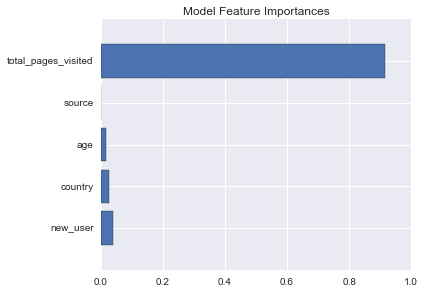

In [24]:
RandForest_feature_importance(df, features, "converted")

#### Looking at the above:
- The total number of pages visited is by far the most important feature
- However, this is also the least "actionable" piece of information
- The conversion process itself likely requires people to visit more pages
- Let's remove this feature and analyse results again

### 3.5 Remove "number of clicks" feature

In [25]:
features_2 = ['country', 'age', 'source', 'new_user']

accuracy_score: 0.9677%

new_user 0.499951775007
country 0.273418405131
age 0.223016397971
source 0.00361342189046


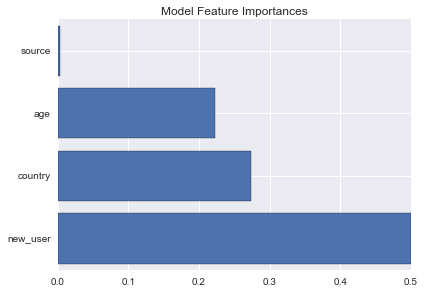

In [26]:
RandForest_feature_importance(df, features_2, "converted")

#### Looking at the above:
- Removing the "total_pages_visited" feature means that "new_user" is now the most important feature
- The source (Ads, Seo, Direct) is negligible.

### 3.6 Partial Dependence plots
- Look at trends of partial dependency plots

In [27]:
def partial_dep_plot(df, features, target):
    
    # split our data into train and test split, can set random_state=1 if repeat analysis desired
    train, test = train_test_split(df, test_size=0.3, random_state=1) 
           
    # assign our features and target variables
    X_test = test[features]
    y_test = test[target]    
    X_train = train[features]
    y_train = train[target]

    clf = GradientBoostingRegressor()
    
    clf.fit(X_train, y_train)
    
    # Now for partial dependence plots
    
    names = ["country", "age", "source", "new_user", "total_pages_visited"]
    
    fig, axs = plot_partial_dependence(clf, X_train, features,
                                       feature_names=names,
                                       n_cols=2, grid_resolution=5, figsize=(10,10))
       
    plt.tight_layout(pad=1.0, w_pad=5.0 ,h_pad=5.0)
    
    plt.show()

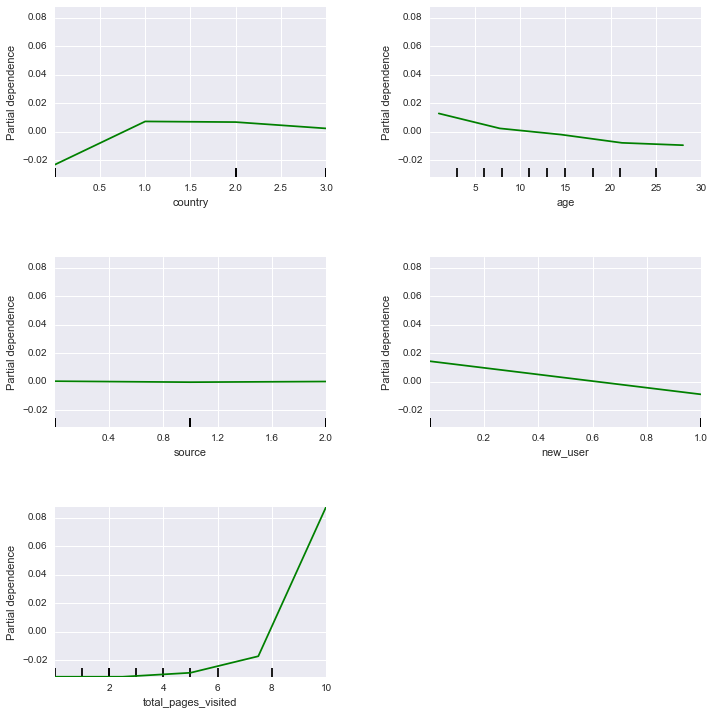

In [28]:
partial_dep_plot(df, features, "converted")

#### Looking at the above:
- The partial dependence plots confirm the results obtained in section 2 and the results of our random forest model:
    - China has a very poor conversion ratio
    - Return visitors are more likely to convert
    - The source (Ad, direct, SEO) is irrelevant
    - Younger people are more likely to convert

## 4.0 Discussion 
- Generally conclusions fall into 2 categories:
    - Advise marketing to squeeze more out of well performing segments
    - Advise product to fix the user experience for bad performing segments

### 4.1 Conclusions & Suggestions

#### 1. The Chinese version of the sites is performing atrociously. Translation? Payment Issue? Given the huge amount of users from China, fixing this should be a priority.

#### 2. Germans have a very high conversion rate, increase marketing to Germans.

#### 3. Returning users more likely to convert, perhaps targeted offers via email.

#### 4. The younger you are the more likely you are to convert. Increase marketing towards younger users and also check the UI to see if there is something causing the poor conversion of older users.

#### 5. If a user has vistied many pages but has failed to convert, then they almost surely have high purchase intent. Targeted offers to this group could be an idea.

#### 6. The source's effect on conversion is minimal. Therefore perhaps focus on obtaining more visitors from the most cost efficient source.